In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

Importing Cleaned Data


In [2]:
df=pd.read_csv("PremierProject(2).csv")

Exploratory Data Analysis


Correlation Heat map showing the 20 features with high correlation with Sale Price

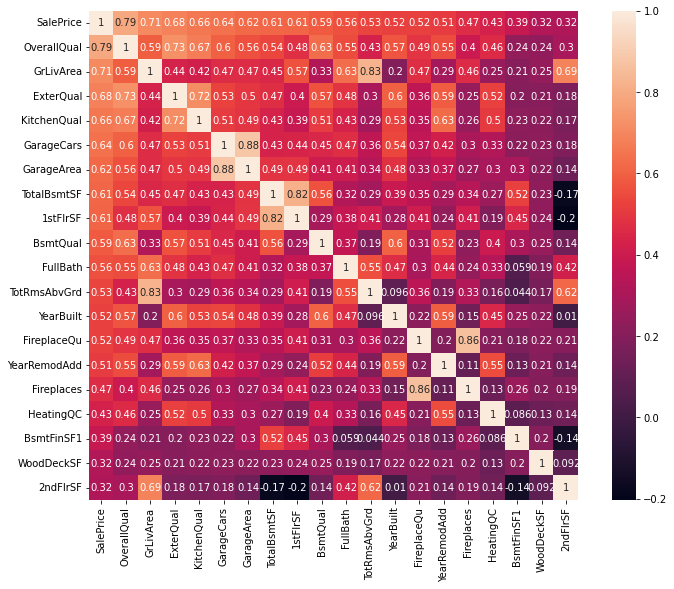

In [5]:
numericals=[col for col in df.columns if df.dtypes[col] != 'object']
corrs = df[numericals].corr()
cols=corrs.nlargest(20, 'SalePrice')['SalePrice'].index
matrix=np.corrcoef(df[cols].values.T)
f,ax= plt.subplots(figsize=(12, 9))
hm = sns.heatmap(matrix, cbar=True, annot=True, square=True, annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

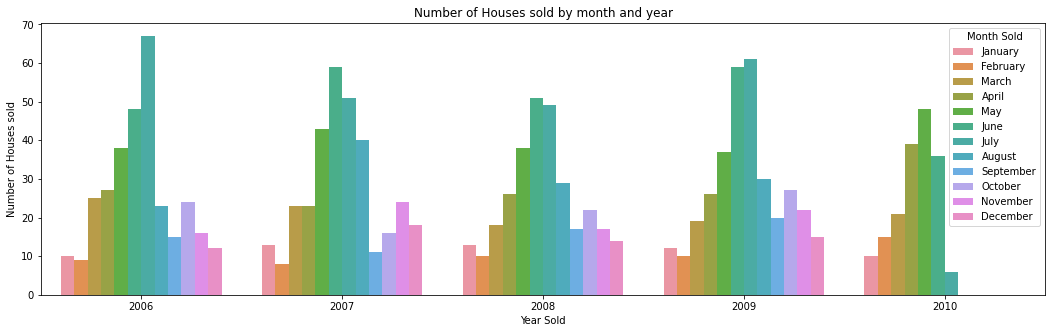

In [ ]:
df["Id"]=list(range(df.info[0]))
group_yrmnth=df.groupby(['YrSold','MoSold']).agg(number=("Id","count")).reset_index()
chart=sns.barplot(x="YrSold", y="number",data=group_yrmnth,hue="MoSold")
plt.rcParams['figure.figsize']=18,5
plt.title('Number of Houses sold by month and year')
plt.xlabel("Year Sold")
plt.ylabel("Number of Houses sold")
labels=["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
h,l=chart.get_legend_handles_labels()
chart.legend(h,labels,title="Month Sold",loc="upper right")
plt.show()
df=df.drop(["Id"],axis=1)

Text(0, 0.5, 'Sale Price')

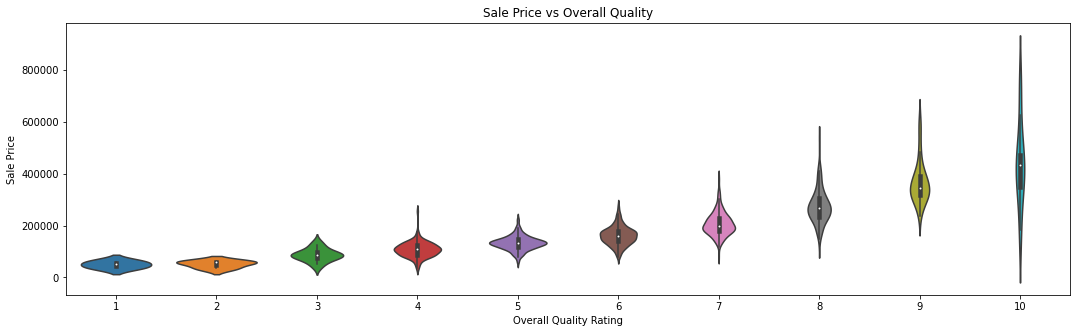

In [ ]:
sns.violinplot(x='OverallQual',y='SalePrice',data=df)
plt.title('Sale Price vs Overall Quality')
plt.xlabel("Overall Quality Rating")
plt.ylabel("Sale Price")

Text(0, 0.5, 'Sale Price')

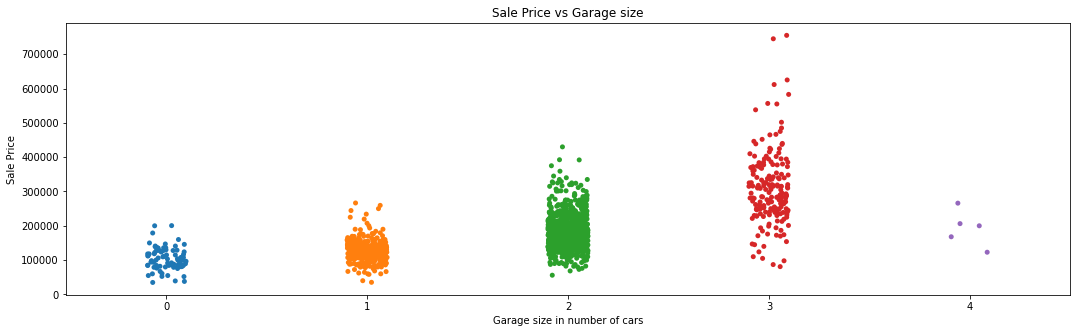

In [ ]:
sns.stripplot(x='GarageCars',y='SalePrice',data=df)
plt.title('Sale Price vs Garage size')
plt.xlabel("Garage size in number of cars")
plt.ylabel("Sale Price")

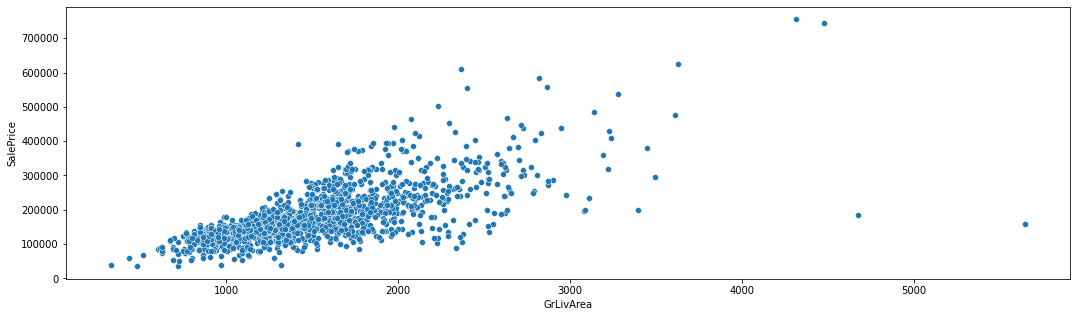

In [ ]:
sns.scatterplot(x="GrLivArea",y="SalePrice",data=df)


Sample code to generate plots to compare model performance after training model:

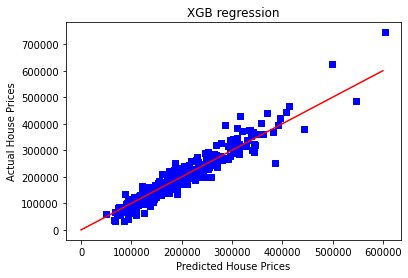

In [ ]:
plt.scatter(y_pred_xgb, y_test, c = "blue", marker = "s", label = "Training House Prices")
plt.title("XGB regression")
plt.xlabel("Predicted House Prices")
plt.ylabel("Actual House Prices")
plt.plot([0, 600000], [0, 600000], c = "red")
plt.show()

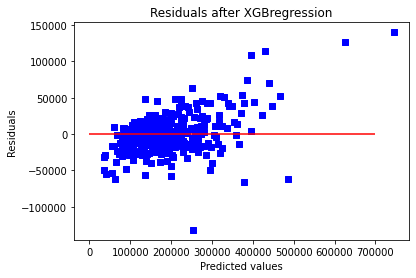

In [ ]:
plt.scatter(y_test, y_test - y_pred_xgb, c = "blue", marker = "s", label = "Training data")
plt.title("Residuals after XGBregression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.hlines(y = 0, xmin = 0, xmax = 700000, color = "red")
plt.show()

Code for Pickling the model:

In [ ]:

with open('model.pkl', 'wb') as handle:
    pickle.dump(model, handle, pickle.HIGHEST_PROTOCOL)

In [ ]:
with open('model.pkl', 'rb') as handle:
    model = pickle.load(handle)